**Step 1: Setup**

In [ ]:
!pip install ta matplotlib seaborn --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.trend import EMAIndicator, SMAIndicator
from pathlib import Path

**Step 2: Load a CSV from /data/processed/static/**

In [ ]:
# Choose any clean stock:
print('TCS')
df = pd.read_csv("data/processed/static/TCS_clean.csv", parse_dates=["Date"], index_col="Date")
df.head()

TCS


,open,high,low,close,volume
Date,,,,,
2004-08-25,1198.7,1198.7,979.00,987.95,17116372
2004-08-26,992.0,997.0,975.30,979.00,5055400
2004-08-27,982.4,982.4,958.55,962.65,3830750
2004-08-30,969.9,990.0,965.00,986.75,3058151
2004-08-31,986.5,990.0,976.00,988.10,2649332


**Step 3: Plot EDA**

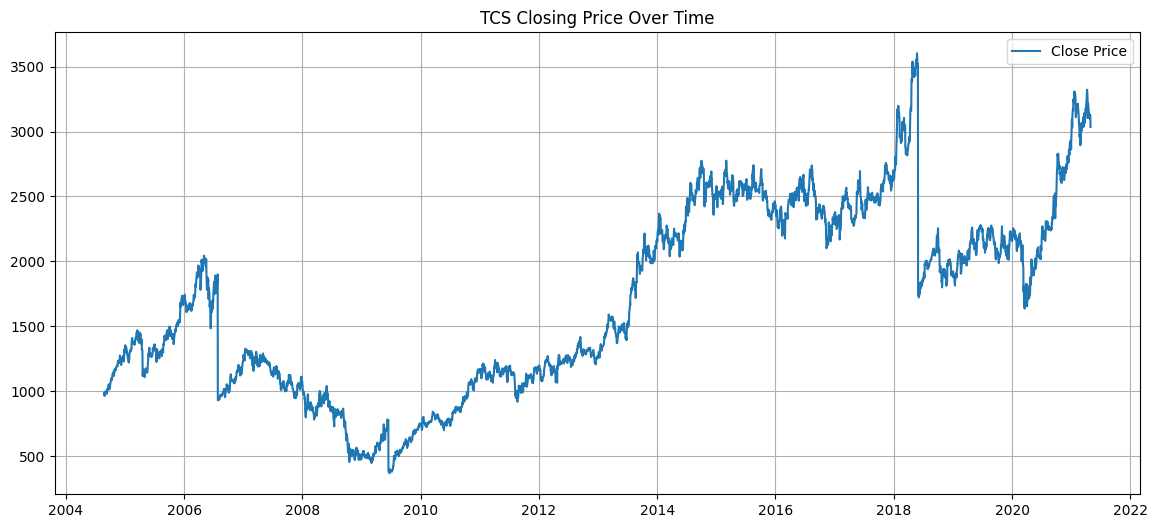

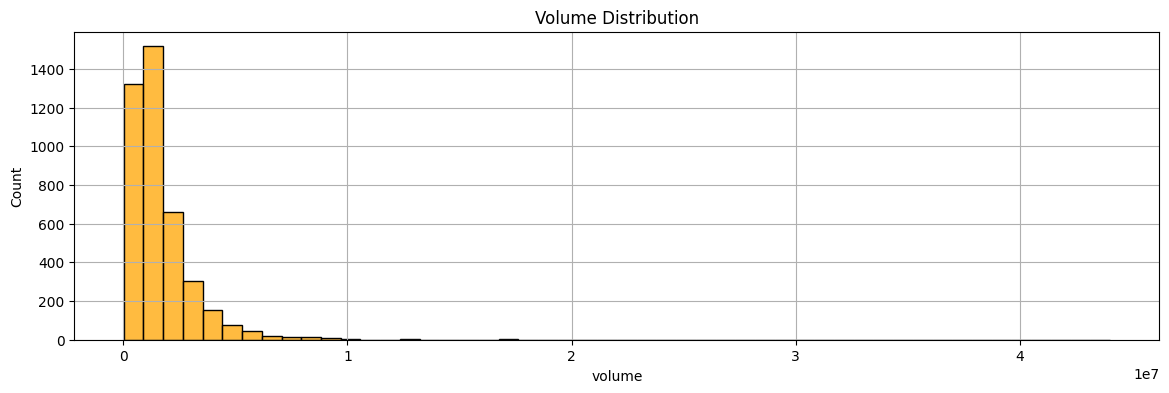

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close Price')
plt.title("TCS Closing Price Over Time")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
sns.histplot(df['volume'], bins=50, color="orange")
plt.title("Volume Distribution")
plt.grid(True)
plt.show()

**Function: enrich_stock_data_folder()**

In [ ]:
import pandas as pd
from ta.momentum import RSIIndicator
from ta.trend import MACD, EMAIndicator, SMAIndicator
import os
from pathlib import Path

def enrich_stock_data_folder(input_folder="data/processed/static", output_folder="data/processed/enriched"):
    Path(output_folder).mkdir(parents=True, exist_ok=True)

    file_list = [f for f in os.listdir(input_folder) if f.endswith(".csv")]
    print(f"📂 Found {len(file_list)} files to process.")

    for file in file_list:
        try:
            file_path = os.path.join(input_folder, file)
            df = pd.read_csv(file_path,skiprows=2)

            # ✅ Fix missing 'Date' column due to index being saved as unnamed
            if 'Date' not in df.columns and df.columns[0].lower().startswith('unnamed'):
                df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

            # ✅ Ensure 'Date' column is parsed correctly
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index("Date", inplace=True)

            # Normalize column names
            df.columns = [col.lower() for col in df.columns]

            # Indicators
            if 'close' in df.columns:
                df['sma_20'] = SMAIndicator(close=df['close'], window=20).sma_indicator()
                df['sma_50'] = SMAIndicator(close=df['close'], window=50).sma_indicator()
                df['ema_20'] = EMAIndicator(close=df['close'], window=20).ema_indicator()
                df['rsi'] = RSIIndicator(close=df['close'], window=14).rsi()
                macd = MACD(close=df['close'])
                df['macd'] = macd.macd()
                df['macd_signal'] = macd.macd_signal()

            df.dropna(inplace=True)
            df.to_csv(os.path.join(output_folder, file))
            print(f"✅ Enriched: {file}")

        except Exception as e:
            print(f"❌ Failed on {file}: {e}")


**Process Kaggle Cleaned Static Datasets**

In [ ]:
enrich_stock_data_folder("data/processed/static", "data/processed/enriched/static")

📂 Found 153 files to process.
✅ Enriched: HEROMOTOCO_clean.csv
✅ Enriched: EICHERMOT_WITH_INDICATORS__clean.csv
✅ Enriched: BERGEPAINT_WITH_INDICATORS__clean.csv
✅ Enriched: PNB_WITH_INDICATORS__clean.csv
✅ Enriched: DRREDDY_WITH_INDICATORS__clean.csv
✅ Enriched: LTI_WITH_INDICATORS__clean.csv
✅ Enriched: TITAN_clean.csv
✅ Enriched: AMBUJACEM_WITH_INDICATORS__clean.csv
✅ Enriched: ITC_clean.csv
✅ Enriched: COLPAL_WITH_INDICATORS__clean.csv
✅ Enriched: ONGC_WITH_INDICATORS__clean.csv
✅ Enriched: HAVELLS_WITH_INDICATORS__clean.csv
✅ Enriched: BHARTIARTL_WITH_INDICATORS__clean.csv
✅ Enriched: ICICIGI_WITH_INDICATORS__clean.csv
✅ Enriched: HDFCBANK_clean.csv
✅ Enriched: BAJAJ-AUTO_WITH_INDICATORS__clean.csv
✅ Enriched: ADANIENT_WITH_INDICATORS__clean.csv
✅ Enriched: RELIANCE_clean.csv
✅ Enriched: ADANIPORTS_WITH_INDICATORS__clean.csv
✅ Enriched: DRREDDY_clean.csv
✅ Enriched: IOC_clean.csv
✅ Enriched: HINDALCO_WITH_INDICATORS__clean.csv
✅ Enriched: NAUKRI_WITH_INDICATORS__clean.csv
✅ Enrich

**Process Yahoo Finance Live Datasets**

In [ ]:
enrich_stock_data_folder("data/processed/live", "data/processed/enriched/live")

📂 Found 117 files to process.
✅ Enriched: RECLTD_NS_live.csv
✅ Enriched: KO_live.csv
✅ Enriched: BEL_NS_live.csv
✅ Enriched: CVX_live.csv
✅ Enriched: PIDILITIND_NS_live.csv
✅ Enriched: IDFCFIRSTB_NS_live.csv
✅ Enriched: SRF_NS_live.csv
✅ Enriched: NESTLEIND_NS_live.csv
✅ Enriched: INDUSINDBK_NS_live.csv
✅ Enriched: AMZN_live.csv
✅ Enriched: INTC_live.csv
✅ Enriched: UBL_NS_live.csv
✅ Enriched: SRTRANSFIN_NS_live.csv
✅ Enriched: V_live.csv
✅ Enriched: DABUR_NS_live.csv
✅ Enriched: CHOLAFIN_NS_live.csv
✅ Enriched: LT_NS_live.csv
✅ Enriched: SIEMENS_NS_live.csv
✅ Enriched: POWERGRID_NS_live.csv
✅ Enriched: AAPL_live.csv
✅ Enriched: ICICIPRULI_NS_live.csv
✅ Enriched: MCDOWELL-N_NS_live.csv
✅ Enriched: NFLX_live.csv
✅ Enriched: DRREDDY_NS_live.csv
✅ Enriched: BAJFINANCE_NS_live.csv
✅ Enriched: GAIL_NS_live.csv
✅ Enriched: BHARTIARTL_NS_live.csv
✅ Enriched: ABBOTINDIA_NS_live.csv
✅ Enriched: NVDA_live.csv
✅ Enriched: L&TFH_NS_live.csv
✅ Enriched: BIOCON_NS_live.csv
✅ Enriched: BPCL_NS_live.c